In [1]:
import pandas as pd

# Load the data from a CSV file
file_path = 'D:\CODE\multi-model knowledge graph multi-graph recommendation system\data\cleanuser_rating.csv'
data = pd.read_csv(file_path)

# Display basic information and the first few rows of the dataset
print("Initial Data:")
print(data.head())
print(data.info())

# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)

# Remove duplicate rows
data = data.drop_duplicates()
print(f"Data after removing duplicates: {data.shape}")

# Check for any unusual ratings
print("Rating value counts:")
print(data['rating'].value_counts().sort_index())

# Basic statistics for numerical columns
print("Statistics for numerical columns:")
print(data.describe())

# Ensure that all ratings are within the expected range (if applicable)
expected_rating_range = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
data = data[data['rating'].isin(expected_rating_range)]
print(f"Data after filtering ratings: {data.shape}")


Initial Data:
   userId  movieId  rating   timestamp
0      11    54995     4.0  1251170120
1      11    57368     3.5  1230788571
2      11    60161     2.0  1230788649
3      11    62956     2.0  1251170520
4      11    64614     4.0  1294796033
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549919 entries, 0 to 549918
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     549919 non-null  int64  
 1   movieId    549919 non-null  int64  
 2   rating     549919 non-null  float64
 3   timestamp  549919 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 16.8 MB
None
Missing Values:
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64
Data after removing duplicates: (549919, 4)
Rating value counts:
rating
0.5      9966
1.0      9346
1.5     10752
2.0     26557
2.5     40264
3.0     86444
3.5    112467
4.0    139402
4.5     70313
5.0     44408
Name: count, dtype: int64
Statistics fo

Initial Data:
   userId  movieId  rating   timestamp
0      11    54995     4.0  1251170120
1      11    57368     3.5  1230788571
2      11    60161     2.0  1230788649
3      11    62956     2.0  1251170520
4      11    64614     4.0  1294796033
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549919 entries, 0 to 549918
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     549919 non-null  int64  
 1   movieId    549919 non-null  int64  
 2   rating     549919 non-null  float64
 3   timestamp  549919 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 16.8 MB
None
Missing Values:
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64
Data after removing duplicates: (549919, 4)
Rating value counts:
rating
0.5      9966
1.0      9346
1.5     10752
2.0     26557
2.5     40264
3.0     86444
3.5    112467
4.0    139402
4.5     70313
5.0     44408
Name: count, dtype: int64
Statistics fo

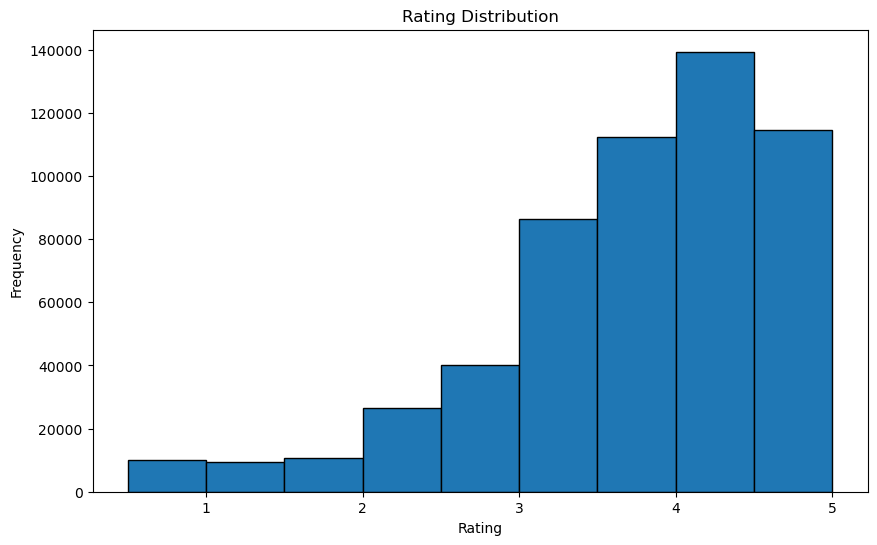

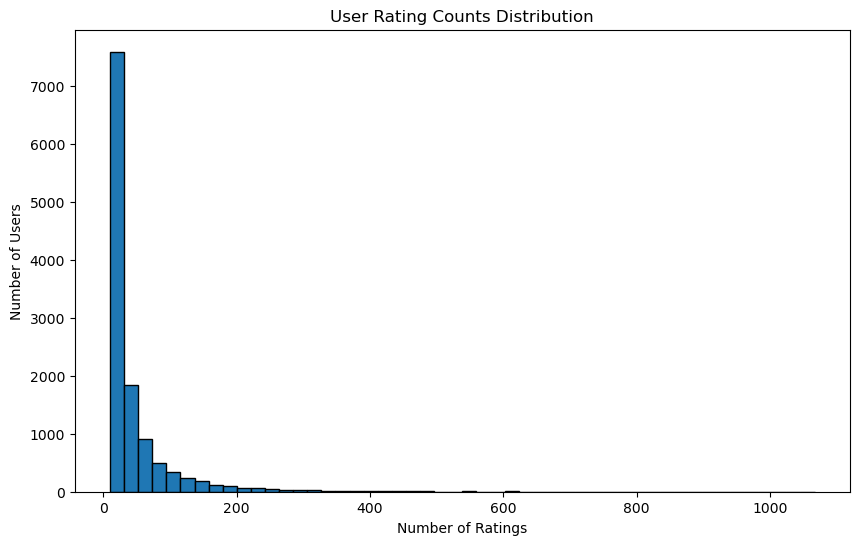

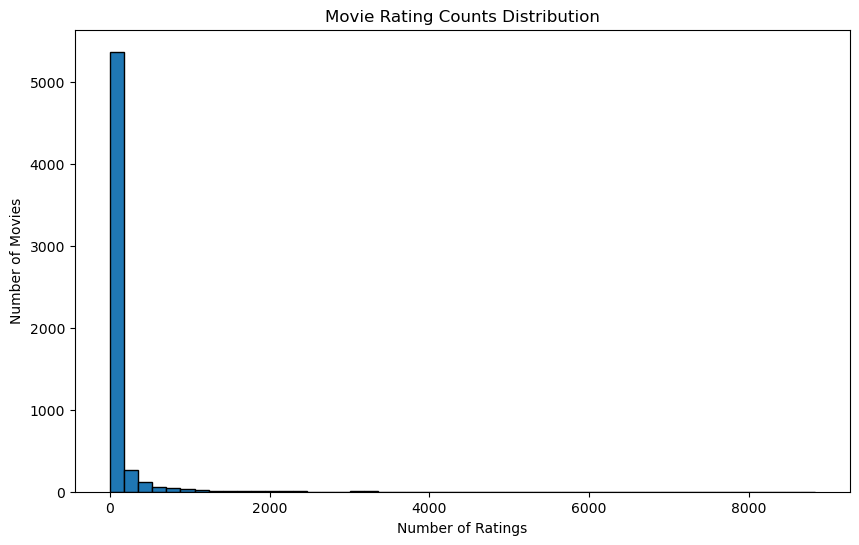

In [5]:
import pandas as pd

# 載入資料
file_path = 'D:\\CODE\\multi-model knowledge graph multi-graph recommendation system\\data\\cleanuser_rating.csv'
data = pd.read_csv(file_path)

# 顯示基本信息和前幾行資料
print("Initial Data:")
print(data.head())
print(data.info())

# 檢查缺失值
missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)

# 刪除重複行
data = data.drop_duplicates()
print(f"Data after removing duplicates: {data.shape}")

# 檢查評分值的分佈
print("Rating value counts:")
print(data['rating'].value_counts().sort_index())

# 數值列的基本統計信息
print("Statistics for numerical columns:")
print(data.describe())

# 確保所有評分都在期望範圍內
expected_rating_range = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
data = data[data['rating'].isin(expected_rating_range)]
print(f"Data after filtering ratings: {data.shape}")

# 分析用戶行為（例如：用戶評分數量的分佈）
user_rating_counts = data['userId'].value_counts()
print("User rating counts:")
print(user_rating_counts.describe())

# 分析電影受歡迎程度（例如：每部電影被評分的次數）
movie_rating_counts = data['movieId'].value_counts()
print("Movie rating counts:")
print(movie_rating_counts.describe())

# 顯示評分分佈直方圖
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
data['rating'].hist(bins=9, edgecolor='black')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

# 顯示用戶評分數量分佈
plt.figure(figsize=(10, 6))
user_rating_counts.hist(bins=50, edgecolor='black')
plt.title('User Rating Counts Distribution')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Users')
plt.grid(False)
plt.show()

# 顯示電影被評分的次數分佈
plt.figure(figsize=(10, 6))
movie_rating_counts.hist(bins=50, edgecolor='black')
plt.title('Movie Rating Counts Distribution')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Movies')
plt.grid(False)
plt.show()


In [2]:
import pandas as pd

# 載入數據
file_path = 'D:\CODE\multi-model knowledge graph multi-graph recommendation system\data\cleanuser_rating.csv'
data = pd.read_csv(file_path)

# 統計每個用戶和每個項目的評分次數
user_counts = data['userId'].value_counts()
item_counts = data['movieId'].value_counts()

# 定義冷啟動用戶和項目的閾值
user_threshold = 20
item_threshold = 10

# 篩選出活躍的用戶和項目
active_users = user_counts[user_counts >= user_threshold].index
active_items = item_counts[item_counts >= item_threshold].index

# 刪除冷啟動用戶和項目
filtered_data = data[(data['userId'].isin(active_users)) & (data['movieId'].isin(active_items))]

print(f"Original data size: {data.shape}")
print(f"Filtered data size: {filtered_data.shape}")


Original data size: (549919, 4)
Filtered data size: (539114, 4)


d:\Anaconda\envs\GNN\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 29992 (\N{CJK UNIFIED IDEOGRAPH-7528}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\Anaconda\envs\GNN\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25142 (\N{CJK UNIFIED IDEOGRAPH-6236}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\Anaconda\envs\GNN\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25976 (\N{CJK UNIFIED IDEOGRAPH-6578}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\Anaconda\envs\GNN\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 35413 (\N{CJK UNIFIED IDEOGRAPH-8A55}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\Anaconda\envs\GNN\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\Anacond

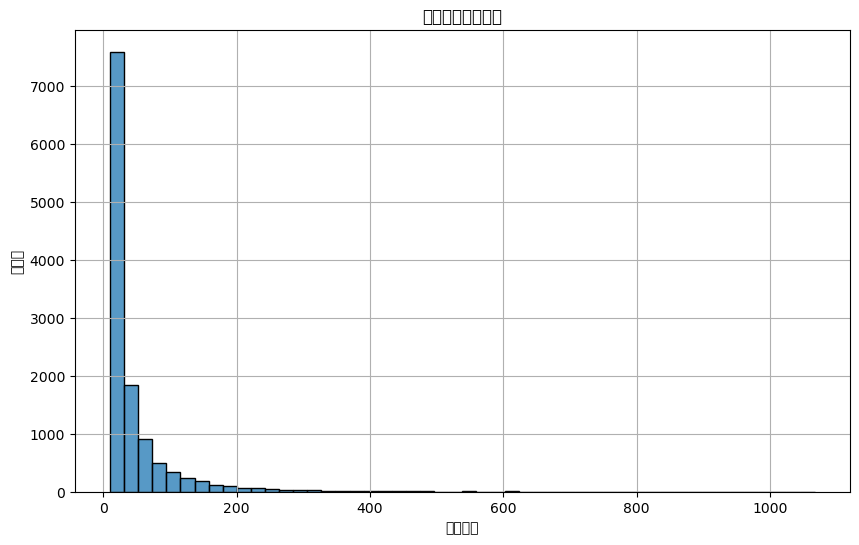

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv(file_path)

# 計算每位用戶的評分次數
user_rating_counts = data['userId'].value_counts()

# 畫出直方圖
plt.figure(figsize=(10, 6))
sns.histplot(user_rating_counts, bins=50, kde=False)
plt.title('用戶評分次數分布')
plt.xlabel('評分次數')
plt.ylabel('用戶數')
plt.grid(True)
plt.show()


In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from surprise import Dataset, Reader, SVD, accuracy
from surprise.model_selection import cross_validate

# 重新載入資料
file_path = 'D:\\CODE\\multi-model knowledge graph multi-graph recommendation system\\data\\cleanuser_rating.csv'
data = pd.read_csv(file_path)

# 確保所有評分都在期望範圍內
expected_rating_range = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
data = data[data['rating'].isin(expected_rating_range)]

# 使用Surprise庫進行推薦系統建模
# 定義資料格式
reader = Reader(rating_scale=(0.5, 5.0))
data_surprise = Dataset.load_from_df(data[['userId', 'movieId', 'rating']], reader)

# 使用SVD模型進行訓練和交叉驗證
algo = SVD()
cross_validate(algo, data_surprise, measures=['RMSE', 'MAE'], cv=5, verbose=True)

# 訓練模型
trainset = data_surprise.build_full_trainset()
algo.fit(trainset)

# 對測試集進行預測
testset = trainset.build_testset()
predictions = algo.test(testset)

# 計算RMSE
rmse = accuracy.rmse(predictions)
print(f"RMSE: {rmse}")

# 儲存模型
import pickle
with open('svd_model.pkl', 'wb') as f:
    pickle.dump(algo, f)


Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.7766  0.7773  0.7749  0.7775  0.7817  0.7776  0.0022  
MAE (testset)     0.5785  0.5798  0.5771  0.5783  0.5809  0.5789  0.0013  
Fit time          3.30    3.31    3.47    3.96    4.00    3.61    0.31    
Test time         0.84    0.52    0.53    0.64    0.93    0.69    0.17    
RMSE: 0.6072
RMSE: 0.6072170558934276


In [8]:
import pandas as pd
import numpy as np

# 重新載入資料
file_path = 'D:\\CODE\\multi-model knowledge graph multi-graph recommendation system\\data\\cleanuser_rating.csv'
data = pd.read_csv(file_path)

# 確保所有評分都在期望範圍內
expected_rating_range = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
data = data[data['rating'].isin(expected_rating_range)]

# 檢查並處理異常值
# 對評分中異常值的檢查（例如所有用戶的平均評分和標準差超出合理範圍）
user_rating_stats = data.groupby('userId')['rating'].agg(['mean', 'std'])
print("User rating stats:")
print(user_rating_stats.describe())

# 過濾異常用戶（例如評分標準差過小或過大的用戶）
threshold_std = 1.5  # 根據具體情況調整
valid_users = user_rating_stats[(user_rating_stats['std'] < threshold_std) & (user_rating_stats['std'] > 0.1)].index
data = data[data['userId'].isin(valid_users)]
print(f"Data after filtering anomalous users: {data.shape}")

# 添加時間特徵
data['timestamp'] = pd.to_datetime(data['timestamp'], unit='s')
data['year'] = data['timestamp'].dt.year
data['month'] = data['timestamp'].dt.month
data['day'] = data['timestamp'].dt.day
print("Data with time features added:")
print(data.head())

# 分析評分分佈
print("Rating value counts:")
print(data['rating'].value_counts().sort_index())

# 用戶評分數量的分佈
user_rating_counts = data['userId'].value_counts()
print("User rating counts:")
print(user_rating_counts.describe())

# 電影評分次數的分佈
movie_rating_counts = data['movieId'].value_counts()
print("Movie rating counts:")
print(movie_rating_counts.describe())

# 標準化評分（如果需要）
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data['rating_scaled'] = scaler.fit_transform(data[['rating']])
print("Data with scaled ratings:")
print(data.head())

# 保存清理後的數據
cleaned_file_path = 'D:\\CODE\\multi-model knowledge graph multi-graph recommendation system\\data\\cleaned_user_rating.csv'
data.to_csv(cleaned_file_path, index=False)
print(f"Cleaned data saved to {cleaned_file_path}")


User rating stats:
               mean           std
count  12171.000000  12171.000000
mean       3.676959      0.818246
std        0.486428      0.300206
min        0.653846      0.000000
25%        3.384615      0.598550
50%        3.708333      0.767268
75%        4.000000      0.990338
max        5.000000      2.147017
Data after filtering anomalous users: (539693, 4)
Data with time features added:
    userId  movieId  rating           timestamp  year  month  day
57      71    79132     5.0 2014-12-01 17:18:23  2014     12    1
58      71    89085     3.5 2014-12-01 17:13:43  2014     12    1
59      71    92259     5.0 2014-12-01 17:18:38  2014     12    1
60      71   104337     3.5 2014-12-01 17:21:33  2014     12    1
61      71   104841     5.0 2014-12-01 17:17:17  2014     12    1
Rating value counts:
rating
0.5      7628
1.0      8677
1.5     10466
2.0     26127
2.5     39929
3.0     85779
3.5    111725
4.0    137997
4.5     69258
5.0     42107
Name: count, dtype: int64
User

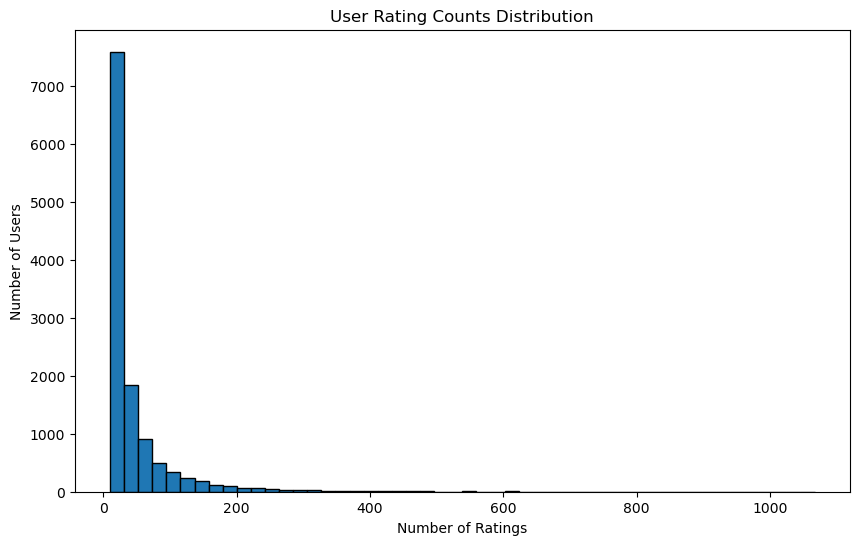

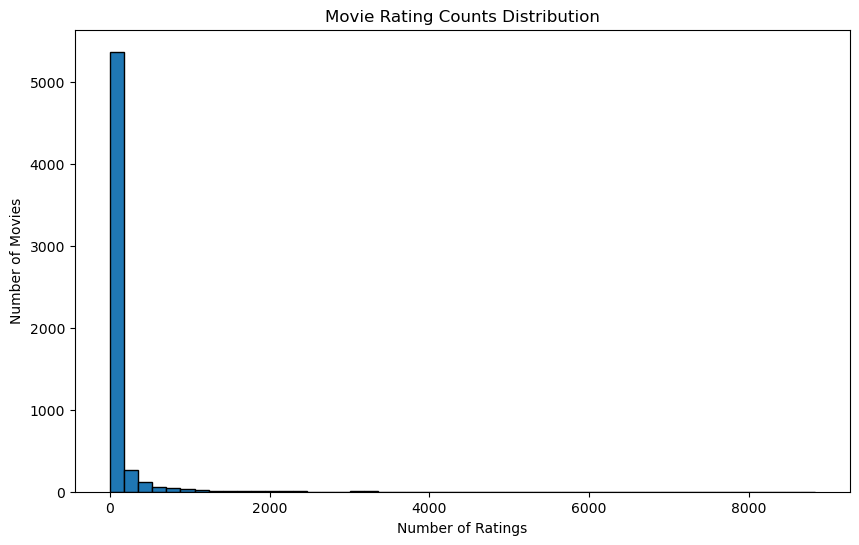

User rating counts descriptive statistics:
count    12171.000000
mean        45.182729
std         62.484347
min         10.000000
25%         14.000000
50%         23.000000
75%         48.000000
max       1067.000000
Name: count, dtype: float64
Movie rating counts descriptive statistics:
count    5996.000000
mean       91.714310
std       363.514248
min         1.000000
25%         2.000000
50%         6.000000
75%        31.000000
max      8821.000000
Name: count, dtype: float64


In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# 重新載入資料
file_path = 'D:\\CODE\\multi-model knowledge graph multi-graph recommendation system\\data\\cleanuser_rating.csv'
data = pd.read_csv(file_path)

# 確保所有評分都在期望範圍內
expected_rating_range = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
data = data[data['rating'].isin(expected_rating_range)]

# 用戶和電影的評分次數
user_counts = data['userId'].value_counts()
movie_counts = data['movieId'].value_counts()

# 繪製用戶評分數量分佈圖
plt.figure(figsize=(10, 6))
user_counts.hist(bins=50, edgecolor='black')
plt.title('User Rating Counts Distribution')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Users')
plt.grid(False)
plt.show()

# 繪製電影評分數量分佈圖
plt.figure(figsize=(10, 6))
movie_counts.hist(bins=50, edgecolor='black')
plt.title('Movie Rating Counts Distribution')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Movies')
plt.grid(False)
plt.show()

# 顯示用戶和電影評分數量的描述性統計
print("User rating counts descriptive statistics:")
print(user_counts.describe())

print("Movie rating counts descriptive statistics:")
print(movie_counts.describe())


In [10]:
from surprise import Dataset, Reader, SVD, accuracy
from surprise.model_selection import cross_validate

# 定義資料格式
reader = Reader(rating_scale=(0.5, 5.0))
data_surprise = Dataset.load_from_df(data[['userId', 'movieId', 'rating']], reader)

def evaluate_threshold(min_ratings_threshold):
    # 過濾掉評分次數少於閾值的用戶和電影
    filtered_data = data.copy()
    user_counts = filtered_data['userId'].value_counts()
    movie_counts = filtered_data['movieId'].value_counts()
    filtered_data = filtered_data[filtered_data['userId'].isin(user_counts[user_counts >= min_ratings_threshold].index)]
    filtered_data = filtered_data[filtered_data['movieId'].isin(movie_counts[movie_counts >= min_ratings_threshold].index)]
    
    # 重新加載過濾後的數據
    filtered_data_surprise = Dataset.load_from_df(filtered_data[['userId', 'movieId', 'rating']], reader)
    
    # 使用SVD模型進行交叉驗證
    algo = SVD()
    results = cross_validate(algo, filtered_data_surprise, measures=['RMSE', 'MAE'], cv=5, verbose=True)
    return results

# 評估不同閾值
thresholds = [5, 10, 15, 20, 25]
for t in thresholds:
    print(f"Evaluating threshold: {t}")
    results = evaluate_threshold(t)
    print(f"Results for threshold {t}: {results}\n")


Evaluating threshold: 5
Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.7784  0.7756  0.7725  0.7717  0.7791  0.7755  0.0030  
MAE (testset)     0.5783  0.5781  0.5751  0.5753  0.5799  0.5773  0.0019  
Fit time          3.38    3.46    3.75    4.00    4.06    3.73    0.28    
Test time         0.79    0.57    0.72    0.83    0.65    0.71    0.10    
Results for threshold 5: {'test_rmse': array([0.77842648, 0.77559584, 0.77251066, 0.77172302, 0.77914815]), 'test_mae': array([0.57833921, 0.57811565, 0.57511242, 0.57528587, 0.57987223]), 'fit_time': (3.3824076652526855, 3.4602773189544678, 3.746373176574707, 4.0038743019104, 4.061514139175415), 'test_time': (0.7896876335144043, 0.5679457187652588, 0.7168793678283691, 0.8344314098358154, 0.6475629806518555)}

Evaluating threshold: 10
Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold

In [11]:
import pandas as pd
import numpy as np

# 重新載入資料
file_path = 'D:\\CODE\\multi-model knowledge graph multi-graph recommendation system\\data\\cleanuser_rating.csv'
data = pd.read_csv(file_path)

# 確保所有評分都在期望範圍內
expected_rating_range = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
data = data[data['rating'].isin(expected_rating_range)]

# 過濾異常用戶
user_rating_stats = data.groupby('userId')['rating'].agg(['mean', 'std', 'count'])
threshold_std = 1.5  # 根據具體情況調整
valid_users = user_rating_stats[(user_rating_stats['std'] < threshold_std) & (user_rating_stats['std'] > 0.1)].index
data = data[data['userId'].isin(valid_users)]

# 刪除評分次數少於閾值的用戶和電影
min_ratings_threshold = 15

# 計算用戶和電影的評分次數
user_counts = data['userId'].value_counts()
movie_counts = data['movieId'].value_counts()

# 過濾掉評分次數少於閾值的用戶和電影
data = data[data['userId'].isin(user_counts[user_counts >= min_ratings_threshold].index)]
data = data[data['movieId'].isin(movie_counts[movie_counts >= min_ratings_threshold].index)]

# 添加時間特徵
data['timestamp'] = pd.to_datetime(data['timestamp'], unit='s')
data['year'] = data['timestamp'].dt.year
data['month'] = data['timestamp'].dt.month
data['day'] = data['timestamp'].dt.day
data['hour'] = data['timestamp'].dt.hour

# 為用戶和電影創建更多特徵
user_stats = data.groupby('userId')['rating'].agg(['mean', 'std', 'count']).reset_index().rename(columns={'mean': 'user_mean_rating', 'std': 'user_std_rating', 'count': 'user_rating_count'})
movie_stats = data.groupby('movieId')['rating'].agg(['mean', 'std', 'count']).reset_index().rename(columns={'mean': 'movie_mean_rating', 'std': 'movie_std_rating', 'count': 'movie_rating_count'})

# 合併用戶和電影特徵到原數據中
data = pd.merge(data, user_stats, on='userId', how='left')
data = pd.merge(data, movie_stats, on='movieId', how='left')

# 標準化評分（如果需要）
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data['rating_scaled'] = scaler.fit_transform(data[['rating']])

# 保存清理後的數據
cleaned_file_path = 'D:\\CODE\\multi-model knowledge graph multi-graph recommendation system\\data\\cleaned_user_rating_no_cold_start.csv'
data.to_csv(cleaned_file_path, index=False)
print(f"Cleaned data without cold start items saved to {cleaned_file_path}")


Cleaned data without cold start items saved to D:\CODE\multi-model knowledge graph multi-graph recommendation system\data\cleaned_user_rating_no_cold_start.csv


In [14]:
import pandas as pd
import numpy as np

# 重新載入資料
file_path = 'D:\\CODE\\multi-model knowledge graph multi-graph recommendation system\\data\\cleanuser_rating.csv'
data = pd.read_csv(file_path)

# 計算清理前的數據量
initial_data_count = data.shape[0]
initial_user_count = data['userId'].nunique()
initial_movie_count = data['movieId'].nunique()

# 確保所有評分都在期望範圍內
expected_rating_range = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
data = data[data['rating'].isin(expected_rating_range)]

# 過濾異常用戶
user_rating_stats = data.groupby('userId')['rating'].agg(['mean', 'std', 'count'])
threshold_std = 1.5  # 根據具體情況調整
valid_users = user_rating_stats[(user_rating_stats['std'] < threshold_std) & (user_rating_stats['std'] > 0.1)].index
data = data[data['userId'].isin(valid_users)]

# 刪除評分次數少於閾值的用戶和電影
min_ratings_threshold = 15

# 計算用戶和電影的評分次數
user_counts = data['userId'].value_counts()
movie_counts = data['movieId'].value_counts()

# 過濾掉評分次數少於閾值的用戶和電影
data = data[data['userId'].isin(user_counts[user_counts >= min_ratings_threshold].index)]
data = data[data['movieId'].isin(movie_counts[movie_counts >= min_ratings_threshold].index)]

# 計算清理後的數據量
cleaned_data_count = data.shape[0]
cleaned_user_count = data['userId'].nunique()
cleaned_movie_count = data['movieId'].nunique()

# 添加時間特徵
data['timestamp'] = pd.to_datetime(data['timestamp'], unit='s')
data['year'] = data['timestamp'].dt.year
data['month'] = data['timestamp'].dt.month
data['day'] = data['timestamp'].dt.day
data['hour'] = data['timestamp'].dt.hour

# 為用戶和電影創建更多特徵
user_stats = data.groupby('userId')['rating'].agg(['mean', 'std', 'count']).reset_index().rename(columns={'mean': 'user_mean_rating', 'std': 'user_std_rating', 'count': 'user_rating_count'})
movie_stats = data.groupby('movieId')['rating'].agg(['mean', 'std', 'count']).reset_index().rename(columns={'mean': 'movie_mean_rating', 'std': 'movie_std_rating', 'count': 'movie_rating_count'})

# 合併用戶和電影特徵到原數據中
data = pd.merge(data, user_stats, on='userId', how='left')
data = pd.merge(data, movie_stats, on='movieId', how='left')

# 標準化評分（如果需要）
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data['rating_scaled'] = scaler.fit_transform(data[['rating']])

# 保存清理後的數據
cleaned_file_path = 'D:\CODE\multi-model knowledge graph multi-graph recommendation system\code\data\dataprocess\\cleaned_user_rating_no_cold_start.csv'
data.to_csv(cleaned_file_path, index=False)
print(f"Cleaned data without cold start items saved to {cleaned_file_path}")

# 打印清理前後的數據量差異
print(f"Initial data count: {initial_data_count}")
print(f"Initial user count: {initial_user_count}")
print(f"Initial movie count: {initial_movie_count}")
print(f"Cleaned data count: {cleaned_data_count}")
print(f"Cleaned user count: {cleaned_user_count}")
print(f"Cleaned movie count: {cleaned_movie_count}")
print(f"Data count reduced by: {initial_data_count - cleaned_data_count}")
print(f"User count reduced by: {initial_user_count - cleaned_user_count}")
print(f"Movie count reduced by: {initial_movie_count - cleaned_movie_count}")


Cleaned data without cold start items saved to D:\CODE\multi-model knowledge graph multi-graph recommendation system\code\data\dataprocess\cleaned_user_rating_no_cold_start.csv
Initial data count: 549919
Initial user count: 12171
Initial movie count: 5996
Cleaned data count: 488256
Cleaned user count: 8770
Cleaned movie count: 2091
Data count reduced by: 61663
User count reduced by: 3401
Movie count reduced by: 3905
